In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from forecaster import Forecaster

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv").sort_values(by=['Date', 'Store'])
test = pd.read_csv("test.csv").sort_values(by=['Date', 'Store'])
stores = pd.read_csv("store.csv")

In [3]:
test['Open'] = test['Open'].fillna(test.groupby('DayOfWeek')['Open'].transform(lambda x: x.mode()[0]))
df = pd.concat([train, test])
df.reset_index(inplace=True, drop=True)

In [4]:
df = df.merge(stores, on='Store', how='left')
df.drop(columns=["Customers"], inplace=True)
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df.groupby('StoreType')['CompetitionDistance'].transform('mean'))
df['StateHoliday'][df['StateHoliday'] == '0'] = "None"
df['StateHoliday'][df['StateHoliday'] == 0] = "None"

In [5]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df.groupby('StoreType')['CompetitionOpenSinceMonth'].transform(lambda x: x.mode()[0]))
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df.groupby('StoreType')['CompetitionOpenSinceYear'].transform(lambda x: x.mode()[0]))
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(df.groupby('StoreType')['Promo2SinceWeek'].transform('mean'))
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(df.groupby('StoreType')['Promo2SinceYear'].transform('mean'))
df['PromoInterval'] = df['PromoInterval'].fillna(df.groupby('StoreType')['PromoInterval'].transform(lambda x: x.mode()[0]))

In [6]:
df = df.drop(columns = 'DayOfWeek')

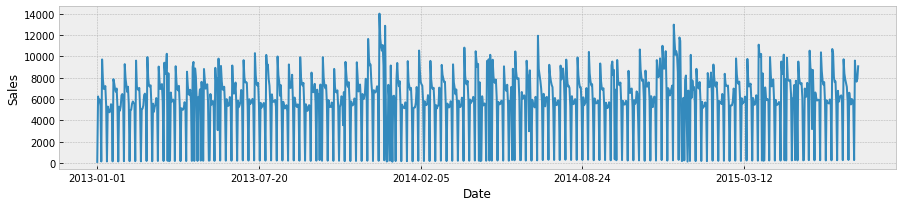

In [7]:
average_sales = df.loc[:len(train)-1].groupby('Date')['Sales'].mean()
ax = average_sales.plot(figsize = (15, 3))
ax.set_ylabel('Sales')
plt.show()

In [8]:
model = Forecaster(
    df,
    x = 'Date',
    y = 'Sales',
    group_features = ['Store'],
    categorical_features = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'],
    keep_id = 'Id'
)

,Training score
XGBRegressor,1.638605e+17


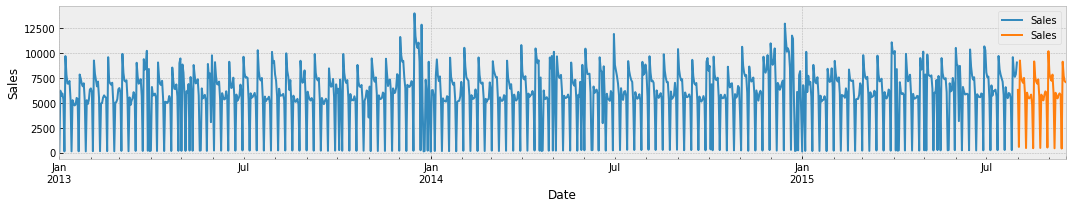

In [10]:
pred, score = model.predict(XGBRegressor, seasonality = True, plot = True)

In [13]:
pred['Id'] = pred['Id'].astype(int)

In [18]:
pred.sort_values(by = 'Id').to_csv('submissionAA.csv', index=False)

In [15]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
40232,40233,1,6,2015-08-01,1.0,0,0,1
40233,40234,3,6,2015-08-01,1.0,0,0,0
40234,40235,7,6,2015-08-01,1.0,0,0,0
40235,40236,8,6,2015-08-01,1.0,0,0,0
40236,40237,9,6,2015-08-01,1.0,0,0,0
...,...,...,...,...,...,...,...,...
851,852,1111,4,2015-09-17,1.0,1,0,0
852,853,1112,4,2015-09-17,1.0,1,0,0
853,854,1113,4,2015-09-17,1.0,1,0,0
854,855,1114,4,2015-09-17,1.0,1,0,0


In [17]:
test.sort_values(by = 'Id')

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
